+ Lê Hoàng Anh Đức
+ 11219268
+ DSEB 63

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

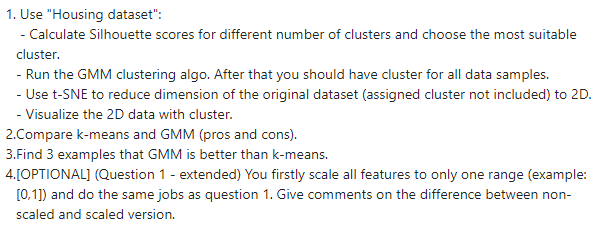

# TASK 1

In [2]:
link = "housing.csv"
df = pd.read_csv(link)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for n_clusters in range(2,20):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(df)
    clusters = kmeans.predict(df)
    silhouette_avg = silhouette_score(df, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.7066301364360299
For n_clusters = 3 The average silhouette_score is : 0.6062753897885378
For n_clusters = 4 The average silhouette_score is : 0.5605365182908093
For n_clusters = 5 The average silhouette_score is : 0.5604470260228552
For n_clusters = 6 The average silhouette_score is : 0.5354841176757429
For n_clusters = 7 The average silhouette_score is : 0.5250614032506884
For n_clusters = 8 The average silhouette_score is : 0.5239917536583778
For n_clusters = 9 The average silhouette_score is : 0.5185039173070577
For n_clusters = 10 The average silhouette_score is : 0.5204049180808029
For n_clusters = 11 The average silhouette_score is : 0.520596145822015
For n_clusters = 12 The average silhouette_score is : 0.5206684811042445
For n_clusters = 13 The average silhouette_score is : 0.5171682152676986
For n_clusters = 14 The average silhouette_score is : 0.5154087430230821
For n_clusters = 15 The average silhouette_score is : 0.5156

The best value is 1 and the worst is -1. Value near 0 indicates overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar. => 2 clusters is the best

In [4]:
from sklearn.mixture import GaussianMixture

n_clusters = 2

# Create and fit the GMM model
gmm = GaussianMixture(n_components=n_clusters, covariance_type='full')
gmm.fit(df)

# Get the predicted cluster labels
labels = gmm.predict(df)

# Print the predicted cluster labels
print("Predicted Cluster Labels:", labels)

Predicted Cluster Labels: [1 1 1 ... 1 1 1]


In [5]:
from sklearn.manifold import TSNE

# Create and fit the t-SNE model
model = TSNE(n_components = 2)
embedded_data = model.fit_transform(df)

# Print the embedded data in 2 dimensions
print("Embedded Data:", embedded_data)

Embedded Data: [[-87.14934  -41.30725 ]
 [ 52.220486 -58.094013]
 [-90.586945  56.038506]
 ...
 [-30.78681  -40.2056  ]
 [-43.10271   10.40852 ]
 [ 25.158384 -45.963528]]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11032\2785673116.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  x1, x2, c=labels, edgecolor="none", alpha=0.9, cmap=plt.cm.get_cmap("Set1", 2)


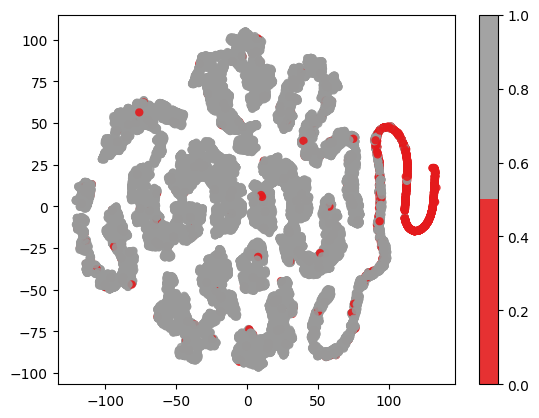

In [6]:
import matplotlib.pyplot as plt

x1 = embedded_data[:, 0]
x2 = embedded_data[:, 1]

plt.scatter(
    x1, x2, c=labels, edgecolor="none", alpha=0.9, cmap=plt.cm.get_cmap("Set1", 2)
)

plt.colorbar()
plt.show()

# TASK 2

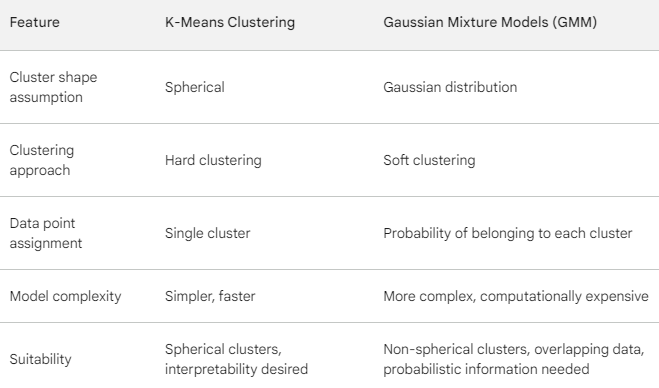

Pros:
+ Handle complex structure data, flexible
+ Soft clustering
+ Less sensitive to outliner

Cons:
+ Computationally expensive
+ Hard to understand

# TASK 3

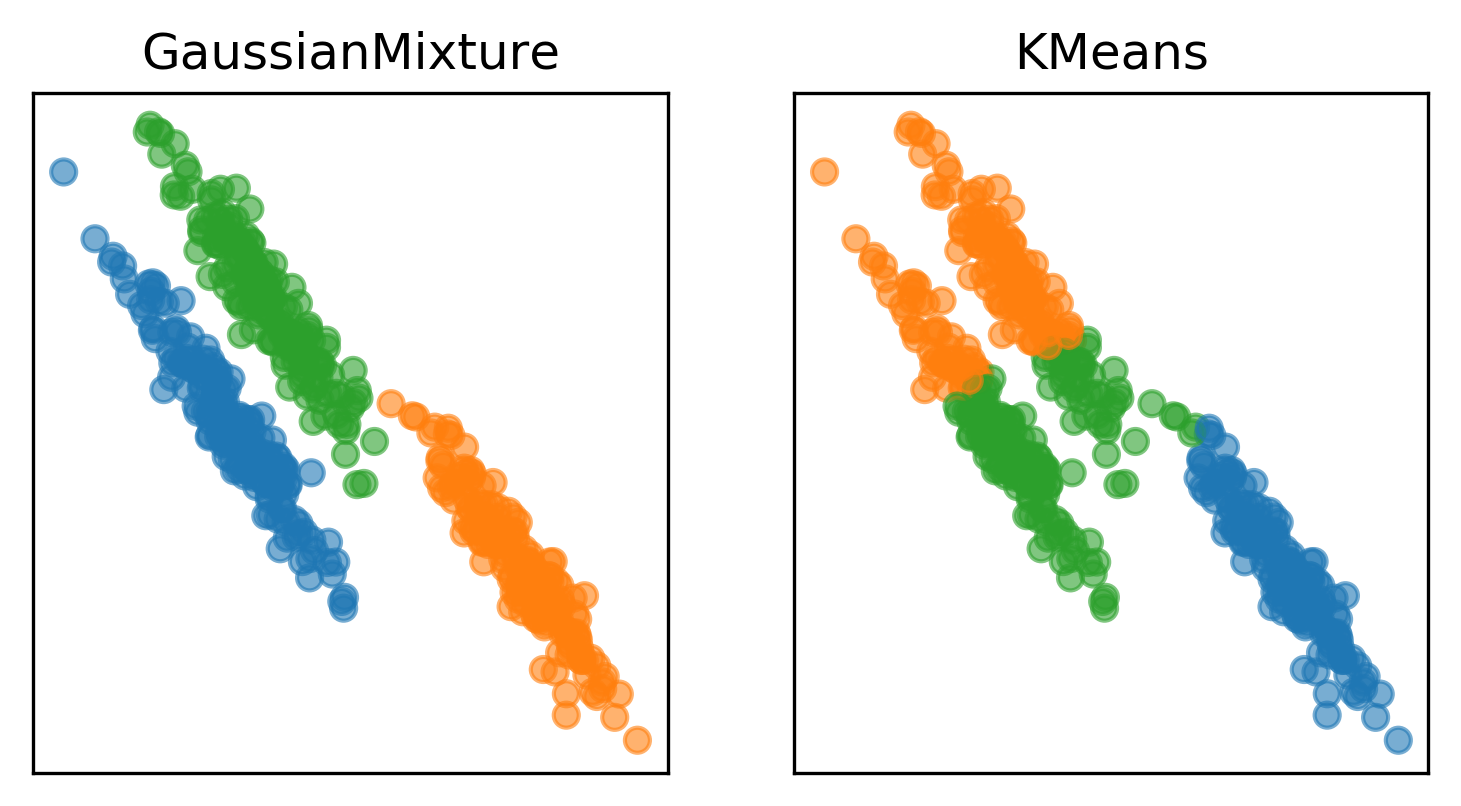

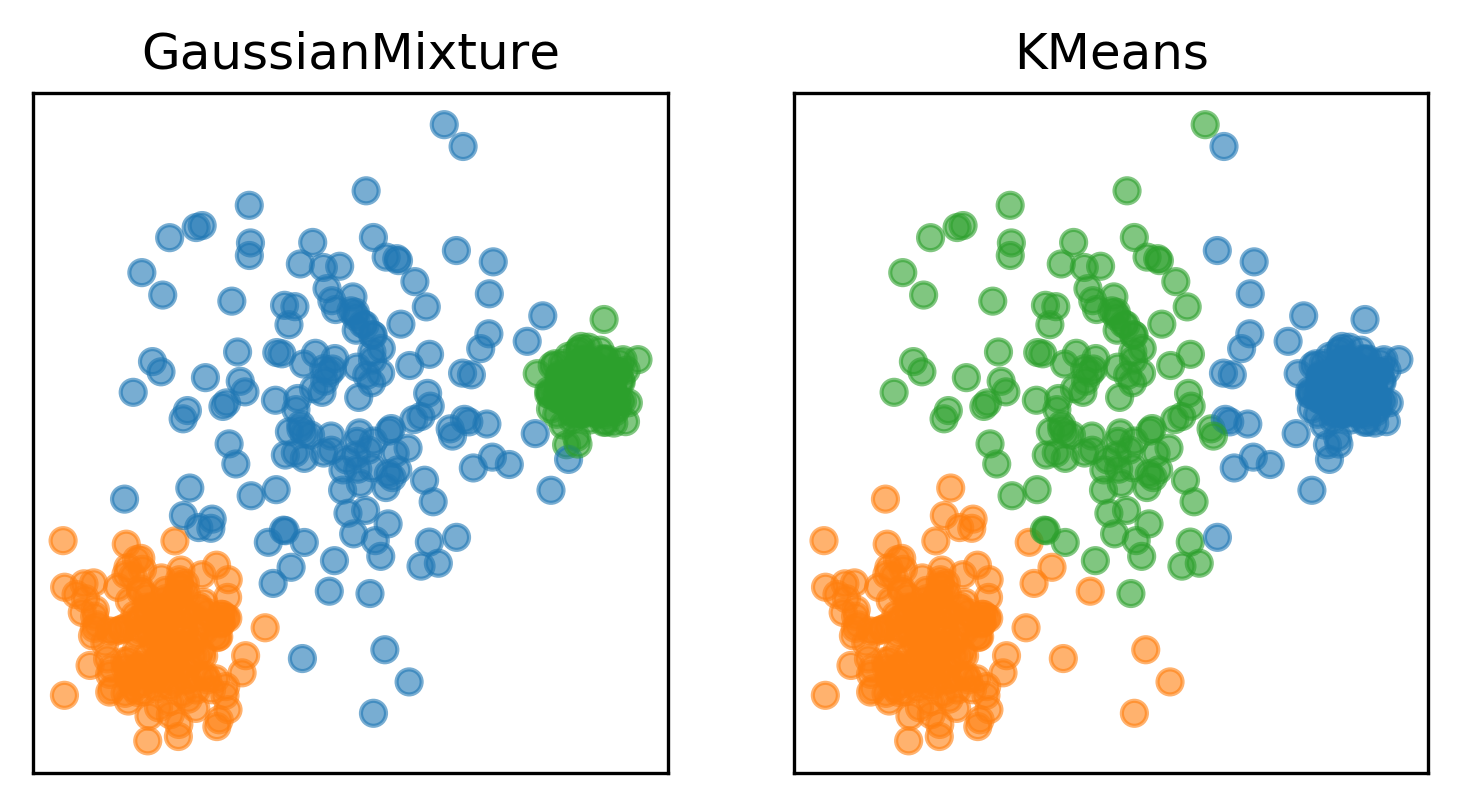

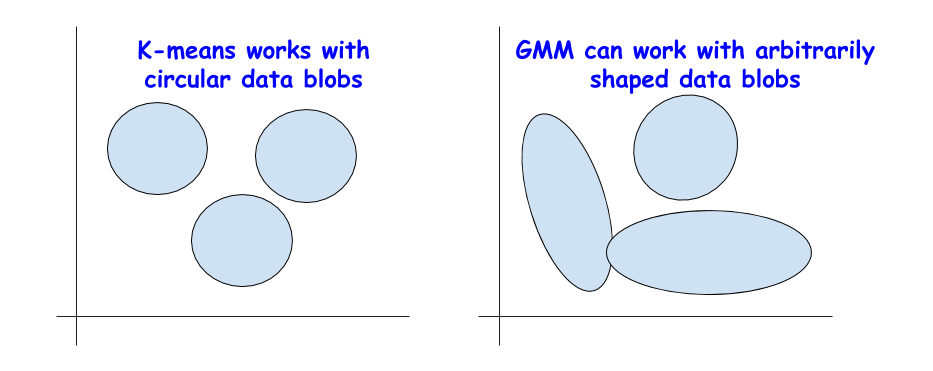

# TASK 4

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0,1))
scaler.fit(df)
scaled_df = scaler.transform(df)
scaled_df

array([[0.53966842, 0.78431373, 0.0435123 , ..., 0.5674814 , 0.21115538,
        0.90226638],
       [0.53802706, 0.39215686, 0.03822395, ..., 0.565356  , 0.21215139,
        0.70824656],
       [0.46602805, 1.        , 0.05275646, ..., 0.5642933 , 0.21015936,
        0.69505074],
       ...,
       [0.08276438, 0.31372549, 0.03090386, ..., 0.73219979, 0.31175299,
        0.15938285],
       [0.09429525, 0.33333333, 0.03178269, ..., 0.73219979, 0.30179283,
        0.14371281],
       [0.13025338, 0.29411765, 0.03125246, ..., 0.72582359, 0.30976096,
        0.15340349]])

In [8]:
for n_clusters in range(2,20):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(scaled_df)
    clusters = kmeans.predict(scaled_df)
    silhouette_avg = silhouette_score(scaled_df, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.3518970354182734
For n_clusters = 3 The average silhouette_score is : 0.3496278585091244
For n_clusters = 4 The average silhouette_score is : 0.30198359788480167
For n_clusters = 5 The average silhouette_score is : 0.3074338662063929
For n_clusters = 6 The average silhouette_score is : 0.3150462090592913
For n_clusters = 7 The average silhouette_score is : 0.3098032573312151
For n_clusters = 8 The average silhouette_score is : 0.2997305346705275
For n_clusters = 9 The average silhouette_score is : 0.2634144122872256
For n_clusters = 10 The average silhouette_score is : 0.2632802575731562
For n_clusters = 11 The average silhouette_score is : 0.2623139379392962
For n_clusters = 12 The average silhouette_score is : 0.25929492027688006
For n_clusters = 13 The average silhouette_score is : 0.25700298831925206
For n_clusters = 14 The average silhouette_score is : 0.25285871230769985
For n_clusters = 15 The average silhouette_score is : 0

In [11]:
n_clusters = 2
gmm = GaussianMixture(n_components=n_clusters, covariance_type='full')
gmm.fit(scaled_df)
labels2 = gmm.predict(scaled_df)

In [12]:
model = TSNE(n_components = 2)
embedded_data2 = model.fit_transform(df)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11032\554471818.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  x1, x2, c=labels2, edgecolor="none", alpha=0.9, cmap=plt.cm.get_cmap("Set1", n_clusters)


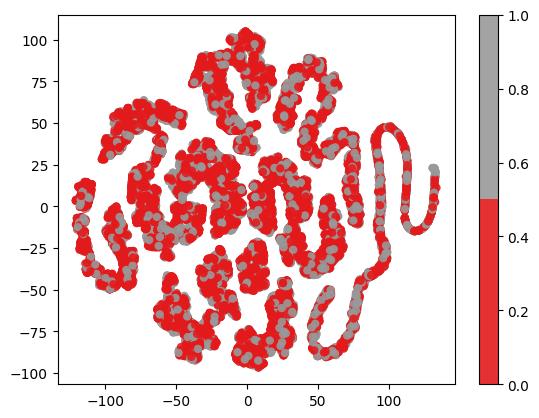

In [13]:
x1 = embedded_data2[:, 0]
x2 = embedded_data2[:, 1]

plt.scatter(
    x1, x2, c=labels2, edgecolor="none", alpha=0.9, cmap=plt.cm.get_cmap("Set1", n_clusters)
)
plt.colorbar()
plt.show()

+ Non-scaled offer better performance than Scaled